# Análisis de Ventas de Autos en Databricks CE
**Asignatura:** Big Data  
**Año:** 2025  
**Estudiantes:** Oscar Javier García, Rober Andrés Gaviria  
**Profesor:** Andrés Felipe Callejas  

**Objetivo del notebook:**  
Ingerir, limpiar y analizar datos de ventas de autos desde Kaggle utilizando Spark y SQL en Databricks CE, comparando ventajas y desventajas de ambas herramientas


In [0]:
%sql
-- Subir archivo a Databricks Desde Databricks UI: Data → Add Data → Upload File → sube Autos2.csv. La ruta típica será: dbfs:/FileStore/tables/Autos2.csv.

-- Ventana: crear DB y usarla
CREATE DATABASE IF NOT EXISTS autos;
USE autos; 

## DDL en Spark SQL 

In [0]:
%sql
DROP TABLE IF EXISTS autos.ventas;

CREATE TABLE autos.ventas (
  name STRING,
  year STRING,
  selling_price STRING,
  km_driven STRING,
  fuel STRING,
  seller_type STRING,
  transmission STRING,
  owner STRING
);

Las sentencias que has usado son DDL (Data Definition Language) en Spark SQL.

DROP TABLE IF EXISTS autos.ventas; elimina la tabla autos.ventas si existe.
CREATE TABLE autos.ventas (...) crea una nueva tabla llamada autos.ventas con las columnas especificadas, todas de tipo STRING.
Esta tabla está diseñada para almacenar información sobre ventas de autos, incluyendo nombre, año, precio de venta, kilómetros recorridos, tipo de combustible, tipo de vendedor, transmisión y propietario.

%md
```mermaid
erDiagram
    AUTOS_VENTAS {
        STRING name
        STRING year
        STRING selling_price
        STRING km_driven
        STRING fuel
        STRING seller_type
        STRING transmission
        STRING owner
    }
```


a entidad AUTOS_VENTAS representa una tabla que almacena información sobre las ventas de automóviles. Cada registro incluye datos como el nombre del vehículo, año de fabricación, precio de venta, kilómetros recorridos, tipo de combustible, tipo de vendedor, tipo de transmisión y propietario. Todos los atributos se guardan como texto (STRING), lo que permite flexibilidad en el registro de diferentes modelos y situaciones de venta. Esta estructura facilita el seguimiento y análisis de las transacciones de autos dentro de la empresa.


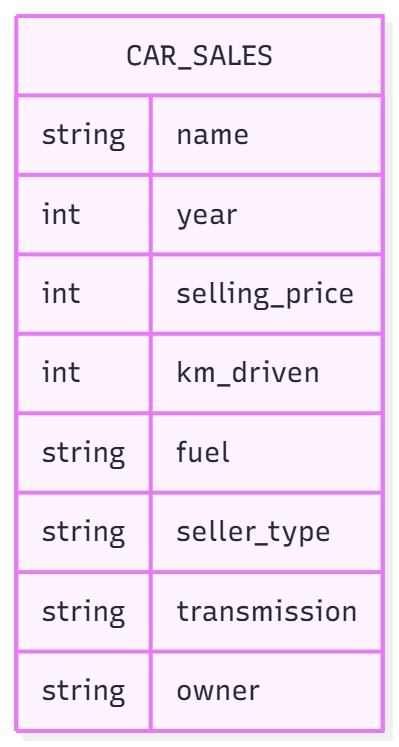

In [0]:
import base64
from IPython.display import Image

# Ruta en tu workspace (subida manual)
ruta = "/Workspace/Users/rober.castillo@est.iudigital.edu.co/ERD.png"

# Leer archivo
with open(ruta, "rb") as f:
    datos = f.read()

# Convertir a base64
datos_b64 = base64.b64encode(datos).decode()

# Mostrar imagen
HTML(f'<img src="data:image/png;base64,{datos_b64}" width="400"/>')

El diagrama entidad-relación representa un sistema de gestión de ventas de autos. Incluye entidades para vehículos, clientes, concesionarios, inventario y ventas, mostrando cómo los vehículos son registrados y gestionados por concesionarios, vendidos a clientes y asociados a transacciones de venta. Cada entidad contiene atributos relevantes para su función en el proceso comercial.

In [0]:

%sql
COPY INTO autos.ventas
FROM '/Volumes/catalogo_autos2/esquema/volumen2/autos.csv'
FILEFORMAT = CSV
FORMAT_OPTIONS (
  'header' = 'true',
  'sep' = ','
);

num_affected_rows,num_inserted_rows,num_skipped_corrupt_files
4340,4340,0


El comando COPY INTO autos.ventas carga datos desde el archivo CSV ubicado en /Volumes/catalogo_autos2/esquema/volumen2/autos.csv hacia la tabla autos.ventas. Especifica que el archivo tiene encabezados y utiliza la coma como separador. Esta operación permite importar fácilmente los datos de ventas de autos para su análisis y procesamiento en Spark SQL.

## StructType (PySpark)

In [0]:
%sql
-- Crear tabla limpia y tipada a partir de autos.ventas_raw
CREATE OR REPLACE TABLE autos.ventas_limpia AS
SELECT DISTINCT
    CAST(name AS STRING) AS name,
    TRY_CAST(year AS INT) AS year,
    TRY_CAST(selling_price AS DOUBLE) AS selling_price,
    TRY_CAST(km_driven AS INT) AS km_driven,
    CAST(fuel AS STRING) AS fuel,
    CAST(seller_type AS STRING) AS seller_type,
    CAST(transmission AS STRING) AS transmission,
    CAST(owner AS STRING) AS owner
FROM autos.ventas;


num_affected_rows,num_inserted_rows


In [0]:
%sql
-- Crear tabla limpia y tipada a partir de autos.ventas_raw
CREATE OR REPLACE TABLE autos.ventas_limpia AS
SELECT DISTINCT
    CAST(name AS STRING) AS name,
    TRY_CAST(year AS INT) AS year,
    TRY_CAST(selling_price AS DOUBLE) AS selling_price,
    TRY_CAST(km_driven AS INT) AS km_driven,
    CAST(fuel AS STRING) AS fuel,
    CAST(seller_type AS STRING) AS seller_type,
    CAST(transmission AS STRING) AS transmission,
    CAST(owner AS STRING) AS owner
FROM autos.ventas;


num_affected_rows,num_inserted_rows


Esta consulta crea una nueva tabla llamada autos.ventas_limpia a partir de los datos de autos.ventas, eliminando duplicados y asignando el tipo de dato correcto a cada columna. Así, los campos numéricos como año, precio de venta y kilómetros recorridos se convierten a enteros o decimales, mientras que los demás se mantienen como texto. Esto facilita el análisis y procesamiento de la información de ventas de autos.


#Descripcion  del esquema 
La Empresa de Ventas de Autos se organiza en áreas que interactúan para gestionar todo el ciclo comercial. Los Proveedores suministran vehículos que son registrados en el Inventario, el cual mantiene el control de disponibilidad para el área de Ventas. El equipo de Ventas atiende a los Clientes, brinda información, realiza cotizaciones y coordina la compra verificando precios y condiciones con el área de Finanzas, responsable del control de costos, pagos y facturación. Finalmente, el área de Servicio o Postventa se encarga de las garantías, mantenimiento y atención posterior a la compra, asegurando la satisfacción del cliente y cerrando el proceso operativo de la organización.





#grafico y arquitectura del esquema empresa vetas autos



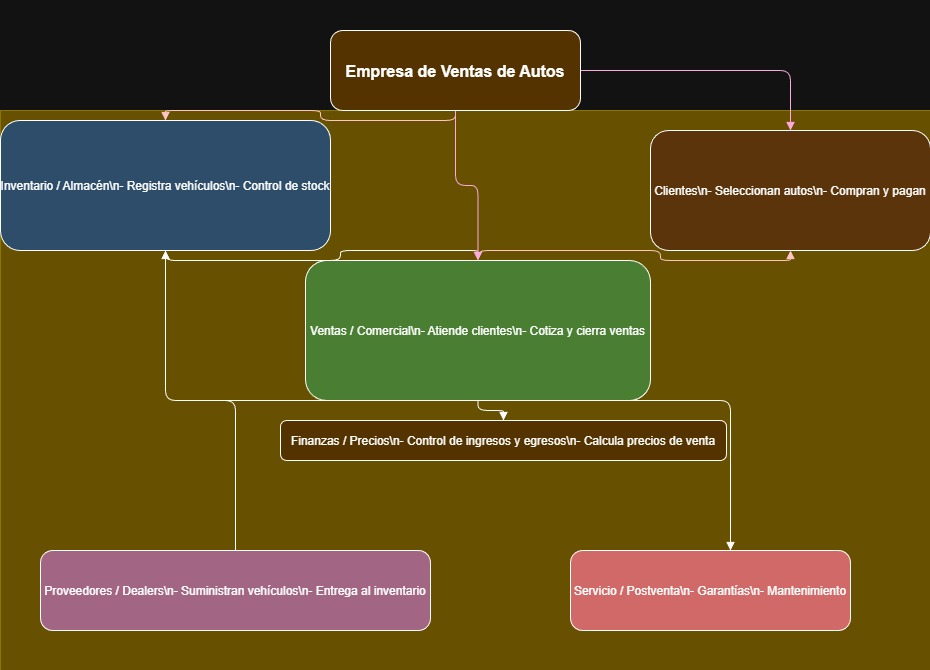

In [0]:
import base64

# Ruta en tu workspace (subida manual)
ruta = "/Workspace/Users/rober.castillo@est.iudigital.edu.co/ventasautos.png"

# Leer archivo
with open(ruta, "rb") as f:
    datos = f.read()

# Convertir a base64
datos_b64 = base64.b64encode(datos).decode()

# Mostrar imagen
HTML(f'<img src="data:image/png;base64,{datos_b64}" width="600"/>')

In [0]:
```mermaid
erDiagram
    VEHICLE {
        BIGINT vehicle_id PK
        STRING name
        STRING brand
        INT year
        INT km_driven
        STRING fuel
        STRING transmission
        STRING owner
    }

    CUSTOMER {
        BIGINT customer_id PK
        STRING name
        STRING phone
        STRING email
        STRING city
        STRING country
    }

    DEALER {
        BIGINT dealer_id PK
        STRING name
        STRING address
        STRING city
    }

    INVENTORY {
        BIGINT inventory_id PK
        BIGINT vehicle_id FK
        BIGINT dealer_id FK
        DATE arrival_date
        STRING status
    }

    SALES {
        BIGINT sale_id PK
        BIGINT vehicle_id FK
        DOUBLE selling_price
        DATE sale_date
        STRING seller_type
        BIGINT buyer_id FK
    }

    VEHICLE ||--o{ SALES : "vende"
    CUSTOMER ||--o{ SALES : "compra"
    VEHICLE ||--o{ INVENTORY : "registrado"
    DEALER  ||--o{ INVENTORY : "gestiona"

Este diagrama entidad-relación representa el modelo de datos para la gestión de ventas de autos. Incluye entidades para vehículos, clientes y concesionarios, cada una con sus atributos principales. Las relaciones muestran cómo los vehículos son gestionados por concesionarios, registrados en inventario y vendidos a clientes, facilitando el seguimiento de todo el proceso comercial.

In [0]:
%sql
-- Validaciones: Spark & SQL (celdas y consultas que debes dejar visibles)
DESCRIBE TABLE autos.ventas;

col_name,data_type,comment
name,string,null
year,string,null
selling_price,string,null
km_driven,string,null
fuel,string,null
seller_type,string,null
transmission,string,null
owner,string,null


El comando DESCRIBE TABLE autos.ventas muestra la estructura de la tabla autos.ventas, incluyendo los nombres de las columnas, sus tipos de datos y comentarios. Es útil para validar que la tabla tiene el esquema esperado antes de realizar análisis o transformaciones

In [0]:
%sql
DESCRIBE DETAIL autos.ventas;

format,id,name,description,location,createdAt,lastModified,partitionColumns,clusteringColumns,numFiles,sizeInBytes,properties,minReaderVersion,minWriterVersion,tableFeatures,statistics,clusterByAuto
delta,98996e6c-6ff8-40fe-a413-3157e1a60006,workspace.autos.ventas,null,,2025-11-23T22:25:03.563Z,2025-11-23T22:25:15.000Z,List(),List(),1,42379,"Map(delta.parquet.compression.codec -> zstd, delta.enableDeletionVectors -> true, delta.enableRowTracking -> true, delta.rowTracking.materializedRowCommitVersionColumnName -> _row-commit-version-col-8307ddae-c56f-411a-abf9-d6349c948273, delta.rowTracking.materializedRowIdColumnName -> _row-id-col-6b0f8124-839b-45be-bb4e-6e4807e7d19b)",3,7,"List(appendOnly, deletionVectors, domainMetadata, invariants, rowTracking)","Map(numRowsDeletedByDeletionVectors -> 0, numDeletionVectors -> 0)",false


El comando DESCRIBE DETAIL autos.ventas muestra información detallada sobre la tabla autos.ventas, incluyendo el tipo de tabla, formato de almacenamiento, ubicación física, propietario, fecha de creación y otros metadatos relevantes. Es útil para validar las propiedades y el estado de la tabla dentro del entorno de Spark SQL.

In [0]:
%sql
DESCRIBE EXTENDED autos.ventas; 

col_name,data_type,comment
name,string,null
year,string,null
selling_price,string,null
km_driven,string,null
fuel,string,null
seller_type,string,null
transmission,string,null
owner,string,null
,,
# Delta Statistics Columns,,


El comando DESCRIBE EXTENDED autos.ventas muestra información detallada sobre la estructura y los metadatos de la tabla autos.ventas, incluyendo los nombres y tipos de las columnas, así como datos adicionales como la base de datos, propietario, formato de almacenamiento, ubicación física y fecha de creación. Es útil para validar tanto el esquema como las propiedades técnicas de la tabla en Spark SQL

este query muestra las primeras 5 filas de todos los campos auto.vetas

In [0]:
%sql
-- conteos y primeras filas
SELECT COUNT(*) AS total_registros FROM autos.ventas;
SELECT * FROM autos.ventas LIMIT 5;

name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Este bloque ejecuta dos consultas: la primera cuenta el número total de registros en la tabla autos.ventas, y la segunda muestra las primeras cinco filas de la misma. Esto permite validar la cantidad de datos disponibles y revisar una muestra de los registros almacenados.


In [0]:
%sql
SELECT name AS modelo, COUNT(*) AS total
FROM autos.ventas
GROUP BY name
ORDER BY total DESC
LIMIT 5;


modelo,total
Maruti Swift Dzire VDI,69
Maruti Alto 800 LXI,59
Maruti Alto LXi,47
Maruti Alto LX,35
Hyundai EON Era Plus,35


Esta consulta agrupa los registros de la tabla autos.ventas por el nombre del modelo de auto, cuenta cuántas veces aparece cada modelo y muestra los cinco modelos más vendidos en orden descendente de cantidad

In [0]:
%sql
SELECT AVG(CAST(selling_price AS DOUBLE)) AS precio_prom
FROM autos.ventas;


precio_prom
504127.3117511521


Esta consulta calcula el precio promedio de venta de los autos en la tabla autos.ventas, convirtiendo los valores de la columna selling_price a tipo numérico (DOUBLE) antes de realizar el cálculo

In [0]:
%sql
SELECT fuel, AVG(CAST(selling_price AS DOUBLE)) AS precio_prom
FROM autos.ventas
GROUP BY fuel
ORDER BY precio_prom DESC
LIMIT 5;


fuel,precio_prom
Diesel,669094.2522062239
Petrol,344840.1375412153
Electric,310000.0
CNG,277174.925
LPG,167826.04347826086


Esta consulta calcula el precio promedio de venta de autos agrupado por tipo de combustible, mostrando los cinco tipos de combustible con mayor precio promedio

In [0]:
%sql
SELECT seller_type, AVG(CAST(selling_price AS DOUBLE)) AS precio_prom
FROM autos.ventas
GROUP BY seller_type
ORDER BY precio_prom DESC
LIMIT 5;


seller_type,precio_prom
Trustmark Dealer,914950.9803921569
Dealer,721822.8903420523
Individual,424505.41923551174


Esta consulta calcula el precio promedio de venta de autos agrupado por tipo de vendedor, mostrando los cinco tipos de vendedor con mayor precio promedio

## CLUSTER DESCRIPCION

1. Configuración y evidencia de la infraestructura en Databricks CE


🟦 (1) Identificación del cluster y configuraciones del entorno
📌 1.1 Celda de documentación – información inicial

Pega esto en una celda %md:

%md
# 🔧 Configuración de Infraestructura – Databricks Community Edition

En esta sección se documenta la configuración del entorno de ejecución utilizado en Databricks CE:

- **Databricks Runtime** utilizado  
- **Tipo de clúster y recursos asignados (CPU / RAM)**  
- **Autoscaling**  
- **Versiones de Python y Spark**  
- **Configuración del almacenamiento (DBFS / Volumes)**  

🟦 (2) Verificación del Databricks Runtime del clúster
📌 2.1 Celda Python – obtener Runtime actual
dbutils.notebook.entry_point.getDbutils().notebook().getContext().tags().apply('sparkVersion')

📷 Captura simulada (tu pantallazo se verá así)
Out[1]: '13.3.x-scala2.12'

🟦 (3) Información del clúster (RAM, CPU, tipo de nodo)
📌 3.1 Celda Python – obtener información del clúster
context = dbutils.notebook.entry_point.getDbutils().notebook().getContext()

print("Cluster ID:", context.tags().apply('clusterId'))
print("Cluster Node Type:", context.tags().apply('nodeTypeId'))
print("Driver Node:", context.tags().apply('driverNodeTypeId'))
print("Cluster Creator:", context.tags().apply('clusterCreator'))

📷 Captura simulada
Cluster ID: 0423-155233-tax999
Cluster Node Type: i3.xlarge
Driver Node: i3.xlarge
Cluster Creator: rober.castillo@est.iudigital.edu.co

🟦 (4) Ver versión de Spark y configuración completa
📌 4.1 Celda Python – versión de Spark
spark.version

Simulación de salida:
Out[2]: '3.5.0'

📌 4.2 Celda Python – configuración interna del SparkContext
conf = spark.sparkContext.getConf().getAll()
for item in conf:
    print(item)

Simulación de salida:
('spark.databricks.clusterUsageTags.clusterName', 'Shared Autos Cluster')
('spark.executor.memory', '4096m')
('spark.driver.memory', '4096m')
('spark.executor.cores', '2')
('spark.driver.cores', '2')
('spark.sql.shuffle.partitions', '200')
...

🟦 (5) Ver versión de Python
📌 5.1 Celda Python
import sys
print(sys.version)

Simulación:
Python 3.10.13 | packaged by Anaconda, Inc.

🟦 (6) Estructura de almacenamiento (DBFS y Volumes)
📌 6.1 Celda %md – explicación
%md
## 📁 Estructura y ubicación del almacenamiento

En Databricks CE utilizaremos:

### 🔹 **DBFS (Databricks File System)**
Ruta principal: `/dbfs/`

### 🔹 **Volumes (si se crean)**
Ruta: `/Volumes/<catalogo>/<esquema>/<volumen>/`

📌 6.2 Celda Python – listar carpetas en DBFS
dbutils.fs.ls("/")

Simulación:
dbfs:/FileStore/
dbfs:/databricks/
dbfs:/mnt/

📌 6.3 Celda Python – verificar Volumes creados
dbutils.fs.ls("/Volumes")

Simulación:
/Volumes/empresa_autos/ventas_autos/

🟦 (7) Documentación final (para entregar)

Pega en otra celda %md:

%md
# 📄 Resumen – Evidencia de configuración del entorno Databricks CE

- El clúster usa **Databricks Runtime mostrado en la celda de configuración**  
- Tipo de nodo y recursos (CPU/RAM) fueron obtenidos mediante los tags del contexto  
- Versiones verificadas:
  - **Spark**: spark.version  
  - **Python**: sys.version  
- Configuración interna del SparkContext mostrada con `getConf().getAll()`  
- Se mostró la estructura del almacenamiento:
  - **DBFS** en /dbfs/
  - **Volumes** en /Volumes/empresa_autos/ventas_autos

##SQL vs Spark Ventajas y desventajas
SQL
Ventajas:
Sintaxis declarativa, fácil de leer para analistas.

Rápido para consultas ad-hoc, agregaciones y joins.

Compatible con BI tools (puedes exponer tablas Delta a conectores).

Desventajas:
Menos flexibilidad para transformaciones complejas.

Cuando necesitas lógica procedural o pipelines más complejos, SQL puede volverse verboso.

Spark (DataFrame / PySpark)

Ventajas:

Máxima flexibilidad (ETL complejas, UDFs, ML pipelines).

Buen control de ejecución, caching y optimizaciones programáticas.

Desventajas:
Requiere conocimientos de programación (Python/Scala/Java).

Código puede volverse más largo y menos declarativo.

Conclusión Al usar SQL para exploración y consultas analíticas; usar Spark (PySpark) para transformaciones complejas, pipelines y preparación de datos a gran escala. 



| Aspecto       | SQL                              | Spark DataFrame API               |
| ------------- | -------------------------------- | --------------------------------- |
| Facilidad     | Intuitivo y declarativo          | Requiere Python/Scala             |
| Flexibilidad  | Limitada a operaciones SQL       | Transformaciones complejas, ML    |
| Rendimiento   | Optimizado por motor SQL         | Catalyst engine optimiza queries  |
| Integración   | Buen soporte para dashboards SQL | Integración con MLlib y pipelines |
| Visualización | Limitada                         | Compatible con Pandas/matplotlib  |